<a href="https://colab.research.google.com/github/vard-uhi/tasks/blob/main/Footbal_Leagua_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2**

*Data: Historical Data of the different Footbal Leaguas*

*Task: Choose a LEAGUE you prefer and solve the following problems*

*   Calculate average number of goals for home and away teams per
SEASON for that league and sort them descending order,Which clubs are
more consistent ?
*   Construct a plot to show how this number is changing over time.
Hint:
SEASON on x-axis. Show average Home goals and Away goals on the
same plot. Be sure that your plot has appropriate axis names and titles.
*   Find following clubs for each season: the best attack (top 5), the best defense (top5)



In [1]:
#import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#load the data
from google.colab import files
data_to_load = files.upload()

Saving data.csv to data.csv


In [3]:
import io
# .read_csv() assigns the information from the initial *.csv file to this variable
raw_data = pd.read_csv(io.BytesIO(data_to_load['data.csv']))

**Checking the content of the dataset**

In [4]:
#copying data
df = raw_data.copy()

In [5]:
df.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A
0,1994.0,England,Premier League,1993-08-14,Arsenal,Coventry,0-3,A,0.0,3.0,3.0,NaN,NaN,NaN
1,1994.0,England,Premier League,1993-08-14,Aston Villa,QPR,4-1,H,4.0,1.0,5.0,NaN,NaN,NaN
2,1994.0,England,Premier League,1993-08-14,Chelsea,Blackburn,1-2,A,1.0,2.0,3.0,NaN,NaN,NaN
3,1994.0,England,Premier League,1993-08-14,Liverpool,Sheffield Weds,2-0,H,2.0,0.0,2.0,NaN,NaN,NaN
4,1994.0,England,Premier League,1993-08-14,Man City,Leeds,1-1,D,1.0,1.0,2.0,NaN,NaN,NaN


In [6]:
#checking unique value to choose one for the analysis
df['LEAGUE'].unique()

array(['Premier League', 'Bundesliga 1', 'La Liga Primera Division',
       'Serie A', 'Le Championnat', 'Eredivisie', 'Liga I',
       'Futbol Ligi 1', 'Ethniki Katigoria', 'Jupiler League'],
      dtype=object)

I will choose 'La Liga Primera Division' as an object for furthur analysis.

# **Exploratory Data Analysis of the "La Liga Primera Division"**

In [7]:
#general summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87816 entries, 0 to 87815
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEASON    87816 non-null  float64
 1   COUNTRY   87816 non-null  object 
 2   LEAGUE    87816 non-null  object 
 3   DATE      87816 non-null  object 
 4   HOMETEAM  87816 non-null  object 
 5   AWAYTEAM  87816 non-null  object 
 6   FTSC      87816 non-null  object 
 7   FTR       87814 non-null  object 
 8   FTHG      87814 non-null  float64
 9   FTAG      87814 non-null  float64
 10  FTTG      87814 non-null  float64
 11  H         57660 non-null  float64
 12  D         57660 non-null  float64
 13  A         57660 non-null  float64
dtypes: float64(7), object(7)
memory usage: 9.4+ MB


In [8]:
#changing datatype of the "Season" from float to integer
df.SEASON = df.SEASON.astype(int)

In [9]:
type(df['SEASON'][0])

numpy.int64

In [10]:
#creating new dataframe with chosen category from "League"
df_new = df[df.LEAGUE == 'La Liga Primera Division']

In [11]:
#to see dataset's first few rows
df_new.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A
768,1994,Spain,La Liga Primera Division,1993-09-05,Ath Bilbao,Albacete,4-1,H,4.0,1.0,5.0,NaN,NaN,NaN
769,1994,Spain,La Liga Primera Division,1993-09-05,Ath Madrid,Logrones,1-0,H,1.0,0.0,1.0,NaN,NaN,NaN
770,1994,Spain,La Liga Primera Division,1993-09-05,Barcelona,Sociedad,3-0,H,3.0,0.0,3.0,NaN,NaN,NaN
771,1994,Spain,La Liga Primera Division,1993-09-05,La Coruna,Celta,0-0,D,0.0,0.0,0.0,NaN,NaN,NaN
772,1994,Spain,La Liga Primera Division,1993-09-05,Osasuna,Real Madrid,1-4,A,1.0,4.0,5.0,NaN,NaN,NaN


In [12]:
#checking for missing values
pd.isnull(df_new).sum()

SEASON         0
COUNTRY        0
LEAGUE         0
DATE           0
HOMETEAM       0
AWAYTEAM       0
FTSC           0
FTR            0
FTHG           0
FTAG           0
FTTG           0
H           3590
D           3590
A           3590
dtype: int64

As we are not going to use "H", "D" and "A" features in our analysis, I will drop them and will aso get rid of the missing values.

In [ ]:
df_new.drop(['H'], axis=1, inplace=True)

In [ ]:
df_new.drop(['D'], axis=1, inplace=True)

In [ ]:
df_new.drop(['A'], axis=1, inplace=True)

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10044 entries, 768 to 85657
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEASON    10044 non-null  int64  
 1   COUNTRY   10044 non-null  object 
 2   LEAGUE    10044 non-null  object 
 3   DATE      10044 non-null  object 
 4   HOMETEAM  10044 non-null  object 
 5   AWAYTEAM  10044 non-null  object 
 6   FTSC      10044 non-null  object 
 7   FTR       10044 non-null  object 
 8   FTHG      10044 non-null  float64
 9   FTAG      10044 non-null  float64
 10  FTTG      10044 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 941.6+ KB


In [17]:
#reset index
df_new = df_new.reset_index(drop=True)

In [18]:
#first few rows
df_new.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG
0,1994,Spain,La Liga Primera Division,1993-09-05,Ath Bilbao,Albacete,4-1,H,4.0,1.0,5.0
1,1994,Spain,La Liga Primera Division,1993-09-05,Ath Madrid,Logrones,1-0,H,1.0,0.0,1.0
2,1994,Spain,La Liga Primera Division,1993-09-05,Barcelona,Sociedad,3-0,H,3.0,0.0,3.0
3,1994,Spain,La Liga Primera Division,1993-09-05,La Coruna,Celta,0-0,D,0.0,0.0,0.0
4,1994,Spain,La Liga Primera Division,1993-09-05,Osasuna,Real Madrid,1-4,A,1.0,4.0,5.0


In [19]:
#looking at unique values in "Season" to have an understanding of the timeframe of the data
df_new['SEASON'].unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

# **Calculate average number of goals for home and away teams per SEASON for that league and sort them descending order. Which clubs are more consistent?**

Abbreviations:

* FTSC = Full Time Score
* FTR = Full Time Result  
* FTHG = Full Time Home Team Goals	
* FTAG = Full Time Away Team Goals
* FTTG = Full Time Total Goal

In [20]:
df_new.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG
0,1994,Spain,La Liga Primera Division,1993-09-05,Ath Bilbao,Albacete,4-1,H,4.0,1.0,5.0
1,1994,Spain,La Liga Primera Division,1993-09-05,Ath Madrid,Logrones,1-0,H,1.0,0.0,1.0
2,1994,Spain,La Liga Primera Division,1993-09-05,Barcelona,Sociedad,3-0,H,3.0,0.0,3.0
3,1994,Spain,La Liga Primera Division,1993-09-05,La Coruna,Celta,0-0,D,0.0,0.0,0.0
4,1994,Spain,La Liga Primera Division,1993-09-05,Osasuna,Real Madrid,1-4,A,1.0,4.0,5.0


In [21]:
#average number of goals for Hometeam per SEASON
hometeam_ave_goals = pd.DataFrame(df_new.groupby(['SEASON', 'HOMETEAM'])['FTHG'].mean()).reset_index()

In [22]:
hometeam_ave_goals.head()

,SEASON,HOMETEAM,FTHG
0,1994,Albacete,1.736842
1,1994,Ath Bilbao,2.052632
2,1994,Ath Madrid,1.684211
3,1994,Barcelona,2.947368
4,1994,Celta,1.315789


In [ ]:
#we want to make all available values visible, hence no limit on maximum value, that is why we use None keyword
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [23]:
#Hometeam average goals per Season ordered by descending, top 1
hometeam_ave_ordered = hometeam_ave_goals.groupby(['SEASON'], sort=False).apply(lambda x: x.sort_values(['FTHG','HOMETEAM'], ascending=False)[:1]) \
    .reset_index(drop=True)

In [24]:
hometeam_ave_ordered.head(10)

,SEASON,HOMETEAM,FTHG
0,1994,Barcelona,2.947368
1,1995,Real Madrid,2.368421
2,1996,Valencia,2.047619
3,1997,Barcelona,3.000000
4,1998,Ath Madrid,2.473684
5,1999,Barcelona,2.736842
6,2000,La Coruna,2.473684
7,2001,Real Madrid,2.789474
8,2002,Real Madrid,2.526316
9,2003,Real Madrid,2.736842


In [25]:
#average number of goals for Awayteam per SEASON
awayteam_ave_goals = pd.DataFrame(df_new.groupby(['SEASON', 'AWAYTEAM'])['FTAG'].mean()).reset_index()

In [26]:
awayteam_ave_goals.head()

,SEASON,AWAYTEAM,FTAG
0,1994,Albacete,0.842105
1,1994,Ath Bilbao,1.157895
2,1994,Ath Madrid,1.157895
3,1994,Barcelona,1.842105
4,1994,Celta,0.842105


In [27]:
#Awayteam average goals per Season ordered by descending, top 1
awayteam_ave_ordered = awayteam_ave_goals.groupby(['SEASON'], sort=False).apply(lambda x: x.sort_values(['FTAG','AWAYTEAM'], ascending=False)[:1]) \
    .reset_index(drop=True)

In [28]:
awayteam_ave_ordered.head(10)

,SEASON,AWAYTEAM,FTAG
0,1994,Barcelona,1.842105
1,1995,Real Madrid,1.631579
2,1996,Ath Madrid,1.666667
3,1997,Barcelona,1.857143
4,1998,Barcelona,1.894737
5,1999,Barcelona,1.842105
6,2000,Malaga,1.578947
7,2001,La Coruna,1.526316
8,2002,Ath Bilbao,1.631579
9,2003,Real Madrid,1.789474


####Construct a plot to show how this number is changing over time. Hint: SEASON on x-axis. Show average Home goals and Away goals on the same plot. Be sure that your plot has appropriate axis names and titles.

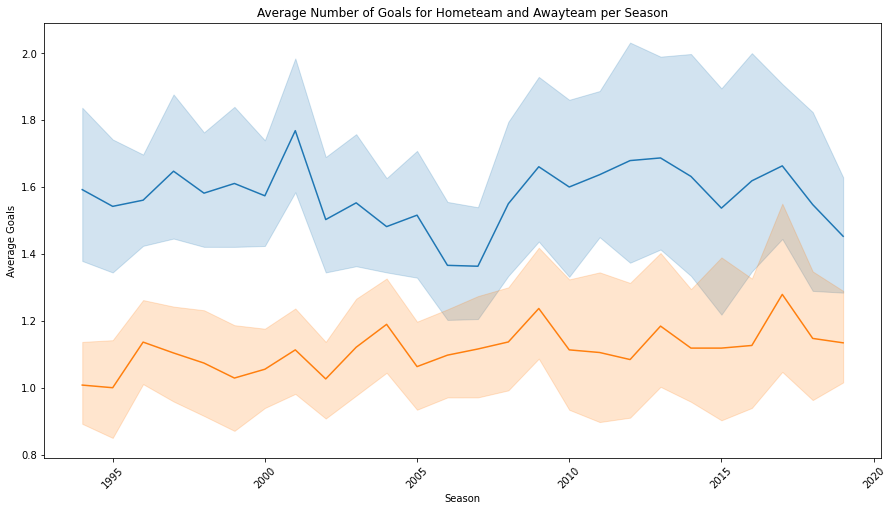

In [32]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x="SEASON", y="FTHG", data=hometeam_ave_goals) 
sns.lineplot(x="SEASON", y="FTAG", data=awayteam_ave_goals, ax=ax) 
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.title('Average Number of Goals for Hometeam and Awayteam per Season')
plt.xticks(rotation=45)
plt.show()

####Find following clubs for each season: the best attack (top 5), the best defense (top5)

In [33]:
#average scored goals for match per season (league average)
ave_scored_goals = (df_new.groupby(['SEASON', 'HOMETEAM'])['FTTG'].sum()) / df_new.groupby(['SEASON']).size()

In [34]:
ave_scored_goals.shape

(524,)

In [35]:
ave_scored_goals.head()

SEASON  HOMETEAM  
1994    Albacete      0.152632
        Ath Bilbao    0.144737
        Ath Madrid    0.139474
        Barcelona     0.192105
        Celta         0.126316
dtype: float64

In [37]:
#attack 
attack_scored_goals = (df_new.groupby(['SEASON', 'HOMETEAM'])['FTHG'].sum()) / df_new.groupby(['SEASON', 'HOMETEAM']).size()

In [38]:
attack_scored_goals.shape

(524,)

In [39]:
attack_scored_goals.head()

SEASON  HOMETEAM  
1994    Albacete      1.736842
        Ath Bilbao    2.052632
        Ath Madrid    1.684211
        Barcelona     2.947368
        Celta         1.315789
dtype: float64

In [40]:
#creating new dataset for Attack
attack = pd.DataFrame()

In [42]:
attack['league average'] = ave_scored_goals

In [43]:
attack['attack scored goals'] = attack_scored_goals

In [44]:
attack.head()

league average  attack scored goals
SEASON HOMETEAM                                       
1994   Albacete          0.152632             1.736842
       Ath Bilbao        0.144737             2.052632
       Ath Madrid        0.139474             1.684211
       Barcelona         0.192105             2.947368
       Celta             0.126316             1.315789

In [45]:
#calculating new variable Attack rating
attack['ATT Rating'] = attack['attack scored goals'] / attack['league average']

In [46]:
attack.head()

league average  attack scored goals  ATT Rating
SEASON HOMETEAM                                                   
1994   Albacete          0.152632             1.736842   11.379310
       Ath Bilbao        0.144737             2.052632   14.181818
       Ath Madrid        0.139474             1.684211   12.075472
       Barcelona         0.192105             2.947368   15.342466
       Celta             0.126316             1.315789   10.416667

In [47]:
#top 5 attack per season
top_5_attack = attack.sort_values(["SEASON", 'ATT Rating','HOMETEAM'],ascending=False).groupby(['SEASON']).head(5)

In [48]:
top_5_attack.head(10)

league average  attack scored goals  ATT Rating
SEASON HOMETEAM                                                    
2019   Ath Madrid         0.110526             1.684211   15.238095
       Barcelona          0.178947             2.684211   15.000000
       Getafe             0.107895             1.473684   13.658537
       Real Madrid        0.123684             1.684211   13.617021
       Valencia           0.094737             1.263158   13.333333
2018   Barcelona          0.168421             2.789474   16.562500
       Ath Madrid         0.100000             1.578947   15.789474
       Real Madrid        0.194737             2.842105   14.594595
       Valencia           0.136842             1.894737   13.846154
       Getafe             0.102632             1.368421   13.333333

Defence

In [50]:
df_new.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG
0,1994,Spain,La Liga Primera Division,1993-09-05,Ath Bilbao,Albacete,4-1,H,4.0,1.0,5.0
1,1994,Spain,La Liga Primera Division,1993-09-05,Ath Madrid,Logrones,1-0,H,1.0,0.0,1.0
2,1994,Spain,La Liga Primera Division,1993-09-05,Barcelona,Sociedad,3-0,H,3.0,0.0,3.0
3,1994,Spain,La Liga Primera Division,1993-09-05,La Coruna,Celta,0-0,D,0.0,0.0,0.0
4,1994,Spain,La Liga Primera Division,1993-09-05,Osasuna,Real Madrid,1-4,A,1.0,4.0,5.0


In [51]:
#defence 
defence_scored_goals = (df_new.groupby(['SEASON', 'HOMETEAM'])['FTAG'].sum()) / df_new.groupby(['SEASON', 'HOMETEAM']).size()

In [52]:
defence_scored_goals.head()

SEASON  HOMETEAM  
1994    Albacete      1.315789
        Ath Bilbao    0.842105
        Ath Madrid    1.105263
        Barcelona     0.894737
        Celta         1.210526
dtype: float64

In [53]:
#creating new dataset for defence
defence = pd.DataFrame()

In [54]:
defence['league average'] = ave_scored_goals

In [55]:
defence['defence scored goals'] = defence_scored_goals

In [56]:
defence.head()

league average  defence scored goals
SEASON HOMETEAM                                        
1994   Albacete          0.152632              1.315789
       Ath Bilbao        0.144737              0.842105
       Ath Madrid        0.139474              1.105263
       Barcelona         0.192105              0.894737
       Celta             0.126316              1.210526

In [59]:
#calculating new variable Defence rating
defence['Defence Rating'] = defence['defence scored goals'] / defence['league average']

In [62]:
defence.head()

league average  defence scored goals  Defence Rating
SEASON HOMETEAM                                                        
1994   Albacete          0.152632              1.315789        8.620690
       Ath Bilbao        0.144737              0.842105        5.818182
       Ath Madrid        0.139474              1.105263        7.924528
       Barcelona         0.192105              0.894737        4.657534
       Celta             0.126316              1.210526        9.583333

In [63]:
#top 5 defence per season
top_5_defence = defence.sort_values(["SEASON", 'Defence Rating','HOMETEAM'], ascending=False).groupby(['SEASON']).head(5)

In [65]:
top_5_attack.head(10)

league average  attack scored goals  ATT Rating
SEASON HOMETEAM                                                    
2019   Ath Madrid         0.110526             1.684211   15.238095
       Barcelona          0.178947             2.684211   15.000000
       Getafe             0.107895             1.473684   13.658537
       Real Madrid        0.123684             1.684211   13.617021
       Valencia           0.094737             1.263158   13.333333
2018   Barcelona          0.168421             2.789474   16.562500
       Ath Madrid         0.100000             1.578947   15.789474
       Real Madrid        0.194737             2.842105   14.594595
       Valencia           0.136842             1.894737   13.846154
       Getafe             0.102632             1.368421   13.333333